# Cpptraj 2D Free Energy Landscape (FEL)
    

In [3]:
#importing modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
#other useful modules
import numpy as np
import pandas as pd

In [4]:
# importing the data obtained from the pca calculation of CPPTRAJ

df = pd.read_fwf("pc1xpc2.dat")#,names = names , skiprows=1)
df.columns = ["PC1", "PC2", "ENERGY"]
df.head()

,PC1,PC2,ENERGY
0,-14.142,-9.682,2.4852
1,-13.440,-9.682,2.4852
2,-12.737,-9.682,2.4852
3,-12.035,-9.682,2.4852
4,-11.332,-9.682,2.4852


In [5]:
df.shape

(1599, 3)

# Simple plot

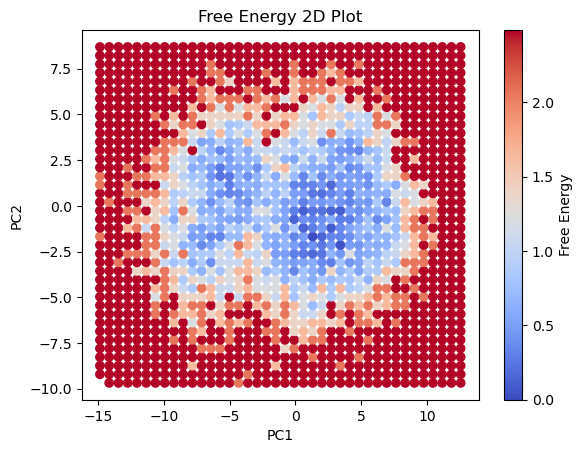

In [7]:
X = df["PC1"]
Y = df["PC2"]
free_energy = df["ENERGY"]

# Creating the plot
plt.figure()
plt.scatter(X, Y, c=free_energy, cmap='coolwarm')

##important to remember the colorbar
plt.colorbar(label='Free Energy')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Free Energy 2D Plot')

# Displaying the plot
plt.show()

# Advanced plot with interpolation (maybe publication quality)

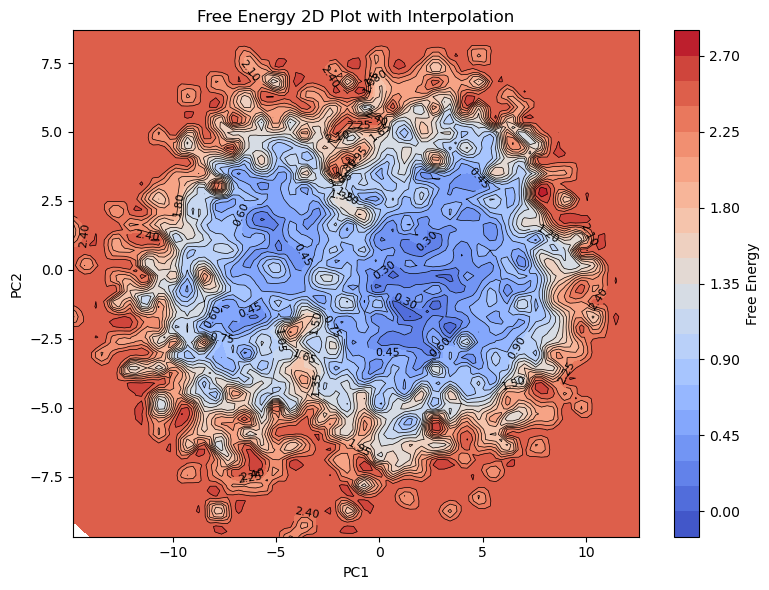

In [12]:

from scipy.interpolate import griddata


# Extracting X, Y, and free energy values from the DataFrame
X = df["PC1"]
Y = df["PC2"]
free_energy = df["ENERGY"]

# Define the grid on which to interpolate the data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)

#remember the meshgrid also
xi, yi = np.meshgrid(xi, yi)

# Interpolate the free energy values on the defined grid
zi = griddata((X, Y), free_energy, (xi, yi), method='cubic')

# Create the plot
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, levels=20, cmap='coolwarm')
plt.colorbar(label='Free Energy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Free Energy 2D Plot with Interpolation')

# Add contour lines
contour_lines = plt.contour(xi, yi, zi, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8)

# Improve plot quality
plt.tight_layout()

# Save the plot to a file (e.g., for publication)
plt.savefig('free_energy_plot.png', dpi=300)

# Display the plot
plt.show()


# Using pcolor and interpolation

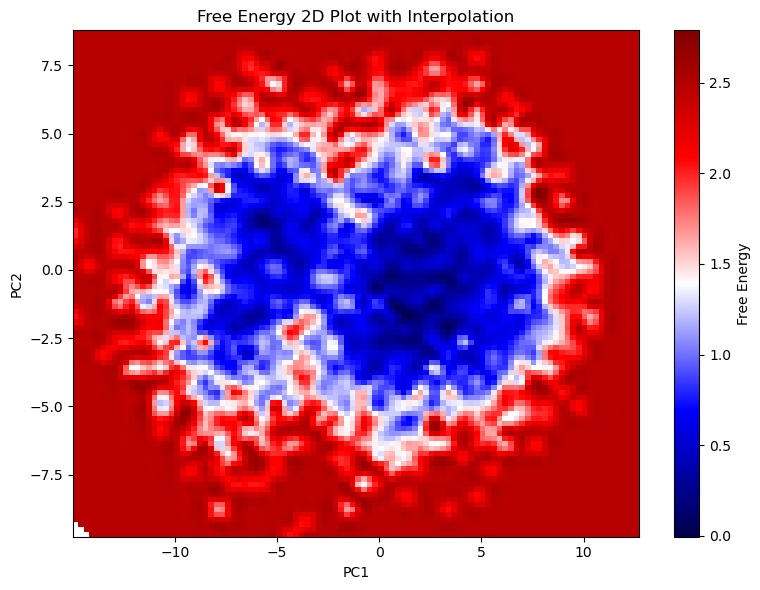

In [13]:


# Extracting X, Y, and free energy values from the DataFrame
X = df["PC1"]
Y = df["PC2"]
free_energy = df["ENERGY"]

# Define the grid on which to interpolate the data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the free energy values on the defined grid
zi = griddata((X, Y), free_energy, (xi, yi), method='cubic')

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolor(xi, yi, zi, cmap='seismic')
plt.colorbar(label='Free Energy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Free Energy 2D Plot with Interpolation')

# Improve plot quality
plt.tight_layout()

# Save the plot to a file (e.g., for publication)
plt.savefig('free_energy_plot.png', dpi=300)

# Display the plot
plt.show()


# Using countourf and interpolation

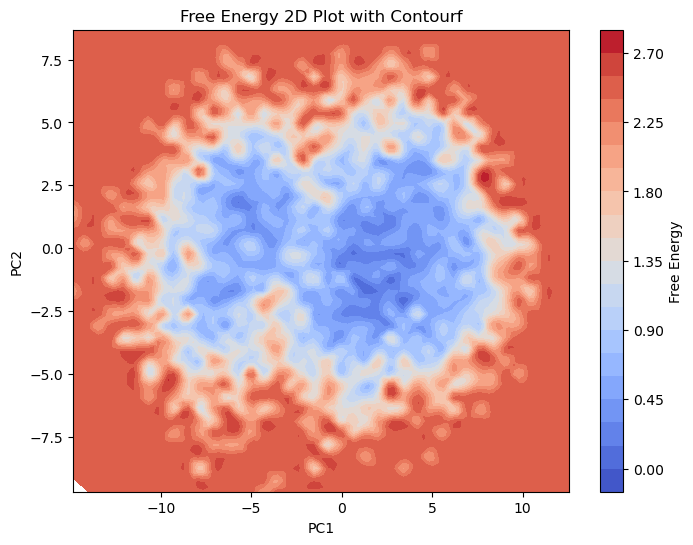

In [54]:

# Extracting X, Y, and free energy values from the DataFrame
X = df["PC1"]
Y = df["PC2"]
free_energy = df["ENERGY"]

# Define the grid on which to interpolate the data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the free energy values on the defined grid
zi = griddata((X, Y), free_energy, (xi, yi), method='cubic')

# Create the filled contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(xi, yi, zi, levels=20, cmap='coolwarm')
plt.colorbar(contour, label='Free Energy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Free Energy 2D Plot with Contourf')

# Display the plot
plt.show()
